In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import data from csv

temp_data = pd.read_csv('combined_data.csv')
temp_data.head()

,year,city,country,city_avg_temp,global_avg_temp
0,1828,Seattle,United States,7.13,8.17
1,1829,Seattle,United States,6.80,7.94
2,1832,Seattle,United States,3.52,7.45
3,1833,Seattle,United States,7.48,8.01
4,1834,Seattle,United States,7.10,8.15


In [4]:
a = temp_data[['city_avg_temp','global_avg_temp']]
print (a.describe(percentiles =[]))

       city_avg_temp  global_avg_temp
count     183.000000       183.000000
mean        7.501366         8.481311
std         0.739375         0.497103
min         3.520000         7.380000
50%         7.500000         8.440000
max         9.950000         9.730000


In [5]:
temp_data['Seattle_MA'] = temp_data['city_avg_temp'].rolling(window=10).mean()

temp_data['Global_MA'] = temp_data['global_avg_temp'].rolling(window=10).mean()
temp_data.tail()

,year,city,country,city_avg_temp,global_avg_temp,Seattle_MA,Global_MA
178,2009,Seattle,United States,8.02,9.51,8.212,9.493
179,2010,Seattle,United States,8.25,9.70,8.265,9.543
180,2011,Seattle,United States,7.35,9.52,8.210,9.554
181,2012,Seattle,United States,8.08,9.51,8.215,9.548
182,2013,Seattle,United States,9.95,9.61,8.336,9.556


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


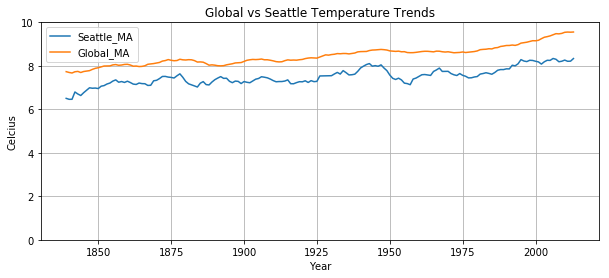

In [6]:
#Create figure and axes object
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))

#Plot temperature data
temp_data.plot(kind='line', x='year',y=['Seattle_MA','Global_MA'], ax=ax)

ax.set(title='Global vs Seattle Temperature Trends',xlabel='Year',ylabel='Celcius',ylim=(0,10))
ax.grid(True)
ax.legend(loc='upper left')

In [7]:

temp_data[['city_avg_temp','global_avg_temp']].describe(percentiles=[])



,city_avg_temp,global_avg_temp
count,183.000000,183.000000
mean,7.501366,8.481311
std,0.739375,0.497103
min,3.520000,7.380000
50%,7.500000,8.440000
max,9.950000,9.730000


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


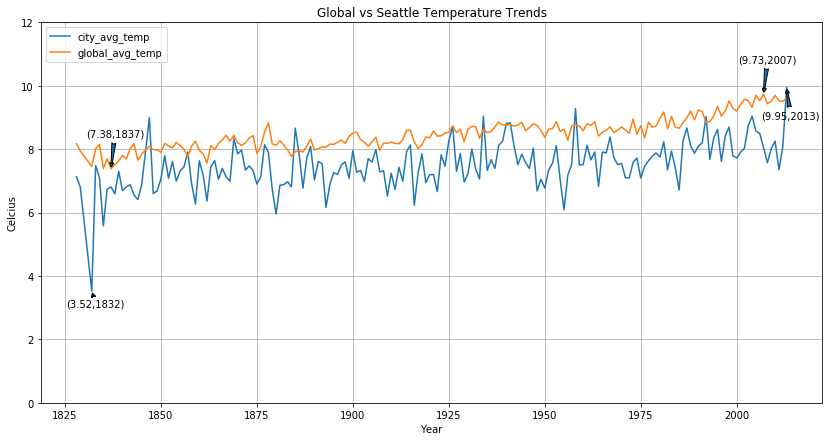

In [8]:
#Create figure and axes object
fig1,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(14,7))

#Plot temperature data without moving averages because we want find the highest and lowest values
temp_data.plot(kind='line', x='year',y=['city_avg_temp','global_avg_temp'], ax=ax1)

ax1.set(title='Global vs Seattle Temperature Trends',xlabel='Year',ylabel='Celcius',ylim=(0,12))
ax1.grid(True)
ax1.legend(loc='upper left')
#Get max and min for Seattle and Global
Seattle_max = temp_data['city_avg_temp'].idxmax()
Seattle_min = temp_data['city_avg_temp'].idxmin()

Global_max = temp_data['global_avg_temp'].idxmax()
Global_min = temp_data['global_avg_temp'].idxmin()

#Annotating min and max values for Seattle
for m,offset in zip([Seattle_max,Seattle_min],[-1,-.5]):
    year = temp_data.loc[m,'year']
    temp = temp_data.loc[m, 'city_avg_temp']
    ax1.annotate('('+str(temp)+','+str(year)+')', xy=(year,temp),xytext=(year+1,temp+offset),
                ha='center',arrowprops = dict(arrowstyle='fancy'))
#Annotating min and max values for Global
for m,offset in zip([Global_max,Global_min],[1,1]):
    year = temp_data.loc[m,'year']
    temp = temp_data.loc[m, 'global_avg_temp']
    ax1.annotate('('+str(temp)+','+str(year)+')', xy=(year,temp),xytext=(year+1,temp+offset),
                ha='center',arrowprops = dict(arrowstyle='fancy'))
                                               
                                               

In [41]:
#Sort data by year
temp_data = temp_data.sort_values(['year'])
temp_data.tail()
temp_data.iloc[-1:,1:2]
temp_data[['year','global_avg_temp']].iloc[-151:-150,]


,year,global_avg_temp
32,1863,8.11


In [77]:
#Function to calcalte slope. Input dataframe must have year and temperature columns only (2 columns)
def cal_slope(dataframe):
    y7 =float(dataframe.iloc[-1:,1:2].values)
    y6 =float(dataframe.iloc[-26:-25,1:2].values)
    y5 =float(dataframe.iloc[-51:-50,1:2].values)
    y4 =float(dataframe.iloc[-76:-75,1:2].values)
    y3 =float(dataframe.iloc[-101:-100,1:2].values)
    y2 =float(dataframe.iloc[-126:-125,1:2].values)
    y1 =float(dataframe.iloc[-151:-150,1:2].values)
    
    return [(y2-y1)/25,(y3-y2)/25,(y4-y3)/25,(y5-y4)/25,(y6-y5)/25,(y7-y6)/25]

#Get slopes 
seattle_slope = cal_slope(temp_data[['year','Seattle_MA']])
global_slope = cal_slope(temp_data[['year','Global_MA']])


 

<class 'list'>


([0.0015999999999999305,
  0.006320000000000192,
  0.016039999999999992,
  0.003160000000000096,
  0.00892000000000003,
  0.02656000000000006],
 [-0.0008799999999999031,
  0.006280000000000036,
  0.013519999999999968,
  -0.0014400000000000545,
  0.009919999999999903,
  0.020279999999999986])

[Text(0,0.5,'slope'),
 Text(0.5,0,'year'),
 Text(0.5,1,'Slope comparision between Seattle and Global temperature lines')]

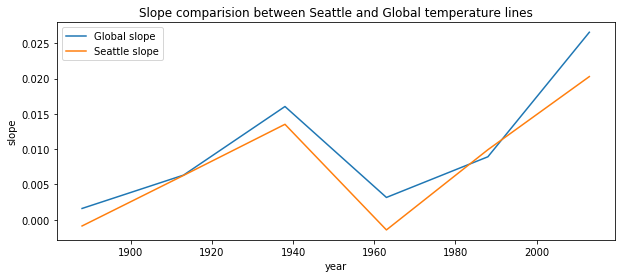

In [85]:
slope_years=[1888,1913,1938,1963,1988,2013]
fig3,ax3 = plt.subplots(figsize=(10,4))

ax3.plot(slope_years,global_slope,label ='Global slope')
ax3.plot(slope_years,seattle_slope,label ='Seattle slope')
ax3.legend(loc='upper left')
ax3.set(title='Slope comparision between Seattle and Global temperature lines',xlabel='year',ylabel='slope')